# 目录

#### 栅格数据基本概念、读取、处理和导出
#### 栅格数据的计算和可视化
#### 多层栅格数据的可视化的计算和可视化

### 栅格数据

栅格数据是和矢量数据完全不同的一种数据形式，它相当与众多的小方格（cells）汇集形成图像

##### 栅格数据有两个核心参数：

空间分辨率（spatial resolution，每一个小方格的高和长）

原点（通常是栅格的左上角，它与坐标参考系中的位置相关联）

##### 相较于矢量数据，栅格数据的优点和缺点：
优点：可以更充分的呈现地图上的各种连续和离散数据

缺点：栅格数据对点、线等数据不够精准

### terra

terra是处理栅格数据最核心的函数库，它能够导入、导出、数据处理、可视化

除了 terra 之外， raster函数库也比较常用， 本课程主要使用terra

In [33]:
library(sf)           
library(terra)          
library(ggplot2)  

### 输入栅格数据

本节使用的例子：地表温度数据

In [4]:
setwd("C:/Users/77387/Desktop/Data_analysis_courses/RandSpecialAnalysis/Chapter6/")

In [5]:
lst <- rast("MOD11A2_2017-07-12.LST_Day_1km.tif")
class(lst)

[1] "SpatRaster"
attr(,"package")
[1] "terra"

直接打印，返回出类型、栅格的维度、cell大小、地理位置、等信息

In [46]:
print(lst)

class       : SpatRaster 
dimensions  : 1110, 3902, 1  (nrow, ncol, nlyr)
resolution  : 0.009009009, 0.009009009  (x, y)
extent      : -104.4326, -69.27943, 30, 40  (xmin, xmax, ymin, ymax)
coord. ref. : lon/lat WGS 84 (EPSG:4326) 
source(s)   : memory
name        : temperature 
min value   :       13741 
max value   :       16396 


In [7]:
ncell(lst) # 返回cell数量

[1] 4331220

In [8]:
nrow(lst) #返回cell行数

[1] 1110

In [9]:
ncol(lst) # 返回cell列数

[1] 3902

In [10]:
nlyr(lst) # 有几组栅格数据？

[1] 1

In [11]:
res(lst) # 空间分辨率

[1] 0.009009009 0.009009009

ext() 返回 SpatExtent，其中含有地理坐标，用于指定新栅格对象的范围或将栅格裁剪到新的范围

In [12]:
lst_ext <- ext(lst)
class(lst_ext)

[1] "SpatExtent"
attr(,"package")
[1] "terra"

In [13]:
lst_ext[1:4]

xmin       xmax       ymin       ymax 
-104.43258  -69.27943   30.00000   40.00000

crs() 返回坐标参考系（coordinate reference system，CRS）

所有的地图数据在制作过程中，都依赖 crs 确定在地球上的位置，可以简单理解为定义地图和地球对应位置的参考系。

后面我们会有一节专门讲crs

In [14]:
crs(lst, parse = TRUE) 

[1] "GEOGCRS[\"WGS 84\","                                      
 [2] "    ENSEMBLE[\"World Geodetic System 1984 ensemble\","    
 [3] "        MEMBER[\"World Geodetic System 1984 (Transit)\"],"
 [4] "        MEMBER[\"World Geodetic System 1984 (G730)\"],"   
 [5] "        MEMBER[\"World Geodetic System 1984 (G873)\"],"   
 [6] "        MEMBER[\"World Geodetic System 1984 (G1150)\"],"  
 [7] "        MEMBER[\"World Geodetic System 1984 (G1674)\"],"  
 [8] "        MEMBER[\"World Geodetic System 1984 (G1762)\"],"  
 [9] "        MEMBER[\"World Geodetic System 1984 (G2139)\"],"  
[10] "        ELLIPSOID[\"WGS 84\",6378137,298.257223563,"      
[11] "            LENGTHUNIT[\"metre\",1]],"                    
[12] "        ENSEMBLEACCURACY[2.0]],"                          
[13] "    PRIMEM[\"Greenwich\",0,"                              
[14] "        ANGLEUNIT[\"degree\",0.0174532925199433]],"       
[15] "    CS[ellipsoidal,2],"                                   
[16] "        AXIS[\"geodetic latitude (Lat)\",north,"          
[17] "            ORDER[1],"                                    
[18] "            ANGLEUNIT[\"degree\",0.0174532925199433]],"   
[19] "        AXIS[\"geodetic longitude (Lon)\",east,"          
[20] "            ORDER[2],"                                    
[21] "            ANGLEUNIT[\"degree\",0.0174532925199433]],"   
[22] "    USAGE["                                               
[23] "        SCOPE[\"Horizontal component of 3D system.\"],"   
[24] "        AREA[\"World.\"],"                                
[25] "        BBOX[-90,-180,90,180]],"                          
[26] "    ID[\"EPSG\",4326]]"

In [15]:
# 数据读入后 SpatRaster 的默认名是文件名
names(lst)

# 重命名
names(lst) <- c("temperature")
names(lst)

[1] "MOD11A2_2017-07-12.LST_Day_1km"

[1] "temperature"

In [16]:
lst <- ifel(lst == 0, NA, lst) # 该数据用缺失值保存为0，转变为NA
lst_c <- lst * 0.02 - 273.15 # 数据集转变为摄氏度

Warning message:
"[summary] used a sample"


  temperature    
 Min.   : 9.1    
 1st Qu.:28.0    
 Median :29.6    
 Mean   :30.3    
 3rd Qu.:31.5    
 Max.   :54.8    
 NA's   :452091  

In [17]:
global(lst_c, fun = "mean", na.rm=T) #全局计算均值
global(lst_c, fun = "min", na.rm=T) #全局计算最小值
global(lst_c, fun = "max", na.rm=T) #全局计算最大值
global(lst_c, fun = "sd", na.rm=T) #全局计算标准差

,mean
,<dbl>
temperature,30.28687


,min
,<dbl>
temperature,1.67


,max
,<dbl>
temperature,54.77


,sd
,<dbl>
temperature,3.652403


使用 writeRaster() 输出栅格数据

In [18]:
writeRaster(lst_c, 
            filename = paste("out.tif",sep=""), 
            filetype="GTiff", overwrite=TRUE )

### 栅格数据地图
一般来说，做地图可视化通常使用ggplot(),但是ggplot需要标准的tidy dataframe，
所以在对栅格数据做可视化之前，我们需要把 SpatRaster 转化为dataframe的形式，

转化后：每行是一个cell， x、y分别标记坐标，其他列标记其他属性

下面我们定义了一个函数 rasterdf(), 专门用来把栅格数据转化为tidy dataframe

In [47]:
rasterdf <- function(x, aggregate = 1) {
    "
aggregate 增大cell面积，降低空间分辨率

"
  resampleFactor <- aggregate        
  inputRaster <- x    
  inCols <- ncol(inputRaster) #取栅格数据的行数和列数
  inRows <- nrow(inputRaster)
  
  # 从原来数据中重新取样
  resampledRaster <- rast(ncol=(inCols / resampleFactor), 
                          nrow=(inRows / resampleFactor),
                          crs = crs(inputRaster))
  # 使新数据的范围（xmax,xmin,Ymax,Ymin）与原来数据的范围相匹配
  ext(resampledRaster) <- ext(inputRaster)
  # 重新取样，新样本中每一个cell相邻的几个cell综合取值
  y <- resample(inputRaster,resampledRaster,method='near')
  # 所有cell的坐标取出来
  coords <- xyFromCell(y, seq_len(ncell(y)))
  # 层名和所有cell的值取出来
  dat <- stack(values(y, dataframe = TRUE))
  # Add names - 'value' for data, 'variable' for different
  # layer names in a multilayer raster
  names(dat) <- c('value', 'variable')
  dat <- cbind(coords, dat)
  dat
}

In [48]:
lst_df <- rasterdf(lst_c, aggregate = 3)
head(lst_df)

,x,y,value,variable
,<dbl>,<dbl>,<dbl>,<fct>
1,-104.4191,39.98649,39.51,temperature
2,-104.3921,39.98649,38.57,temperature
3,-104.3650,39.98649,43.23,temperature
4,-104.3380,39.98649,43.87,temperature
5,-104.3110,39.98649,44.67,temperature
6,-104.2840,39.98649,44.65,temperature


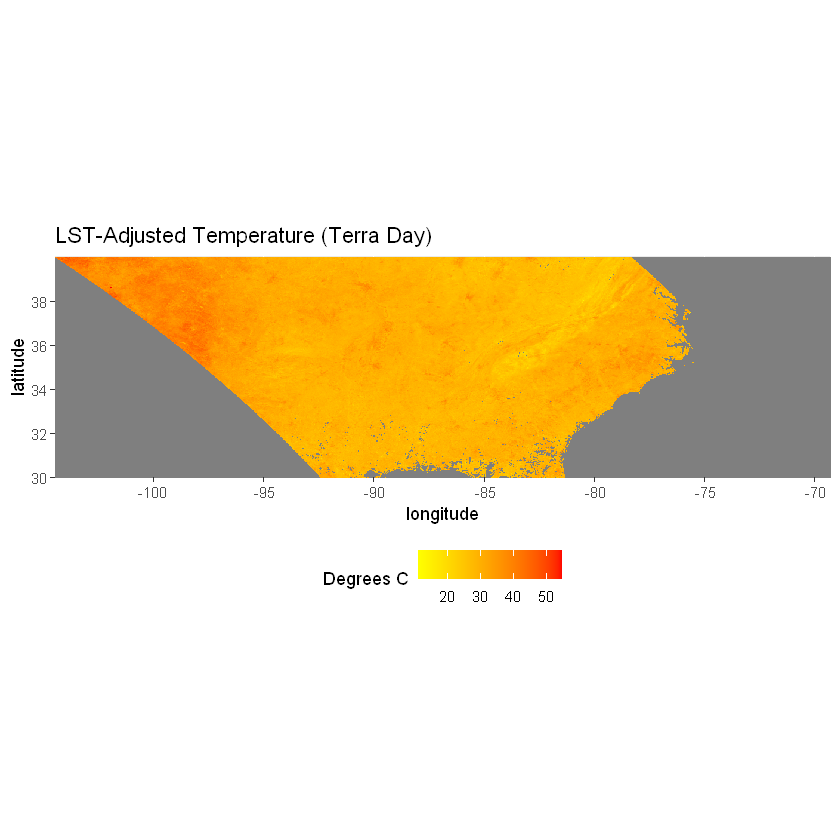

In [21]:
ggplot(data = lst_df) +
  geom_raster(aes(x = x, 
                  y = y, 
                  fill = value)) +
  scale_fill_gradient(name = "Degrees C", 
                      low = "yellow", 
                      high = "red") +
  coord_sf(expand = FALSE) +
  labs(title = "LST-Adjusted Temperature (Terra Day)",
       x = "longitude", 
       y = "latitude") +
  theme(legend.position = "bottom")

我们可以使用ext函数配合cop剪切出一部分数据

In [49]:
clipext <- ext(-86, -80.5, 30, 35.5)
class(clipext)


[1] "SpatExtent"
attr(,"package")
[1] "terra"

In [50]:
lst_clip <- crop(lst_c, clipext)
lst_clip_df <- rasterdf(lst_clip)

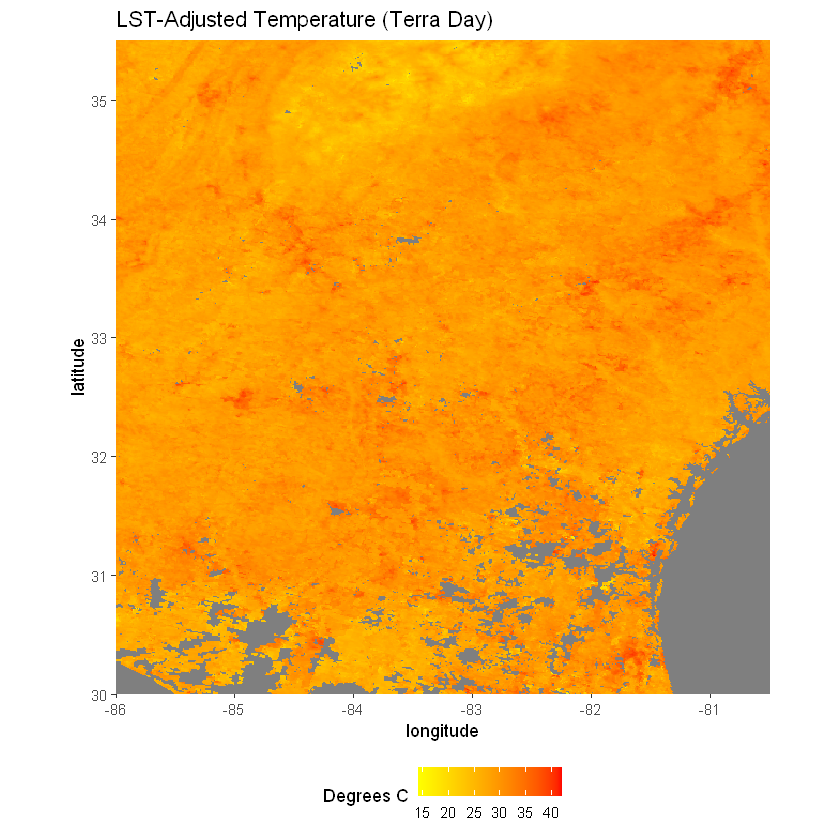

In [51]:
ggplot(data = lst_clip_df) +
  geom_raster(aes(x = x, 
                  y = y, 
                  fill = value)) +
  scale_fill_gradient(name = "Degrees C", 
                      low = "yellow", 
                      high = "red") +
  coord_sf(expand = FALSE) +
  labs(title = "LST-Adjusted Temperature (Terra Day)",
       x = "longitude", 
       y = "latitude") +
  theme(legend.position = "bottom")

### 矢量数据和栅格数据可以一同可视化出来


In [24]:
ga_sf <- st_read(dsn = "GA_SHP.shp", quiet = TRUE)

该矢量数据包含村镇的边界

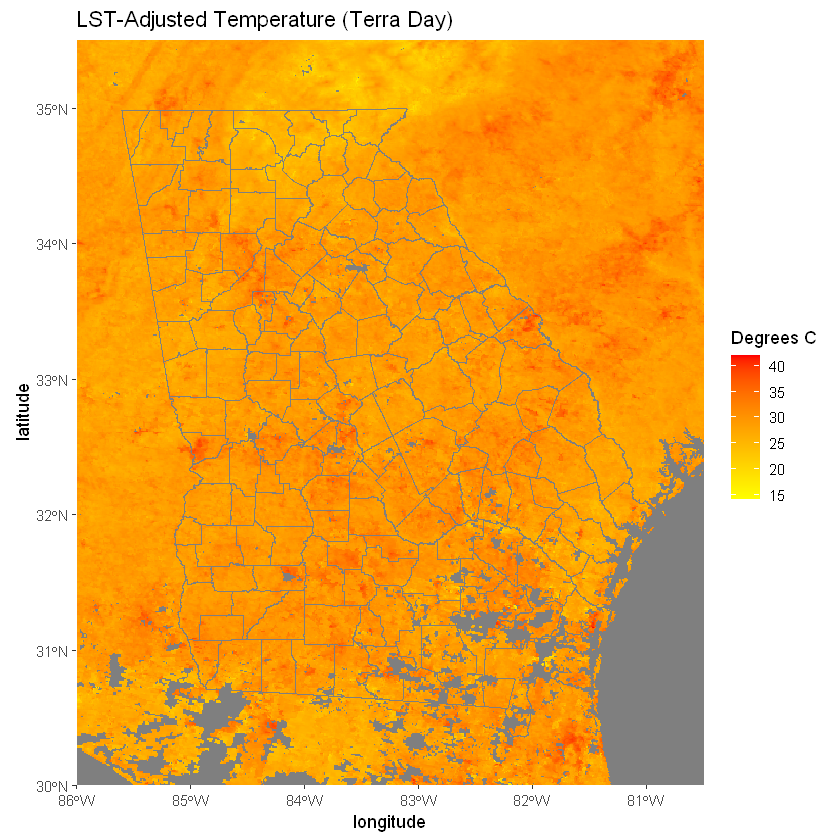

In [25]:
ggplot() +  
  geom_raster(data = lst_clip_df, 
              aes(x = x, 
                  y = y, 
                  fill = value)) +
  geom_sf(data=ga_sf, 
          color = "grey50", 
          fill = NA, size = 0.5) +
  scale_fill_gradient(name = "Degrees C", 
                      low = "yellow", 
                      high = "red") +
  coord_sf(expand = FALSE) +
  labs(title = "LST-Adjusted Temperature (Terra Day)",
       x = "longitude", 
       y = "latitude")

### 多层栅格数据
此案例使用多层栅格数据，使用北美12年-17年的气象数据

In [52]:
temp2012 <- rast("NLDAS_FORA0125_M.A201207.002.grb.temp.tif")
temp2013 <- rast("NLDAS_FORA0125_M.A201307.002.grb.temp.tif")
temp2014 <- rast("NLDAS_FORA0125_M.A201407.002.grb.temp.tif")
temp2015 <- rast("NLDAS_FORA0125_M.A201507.002.grb.temp.tif")
temp2016 <- rast("NLDAS_FORA0125_M.A201607.002.grb.temp.tif")
temp2017 <- rast("NLDAS_FORA0125_M.A201707.002.grb.temp.tif")

使用c()可以把多层合起来，形成多层栅格数据

In [53]:
tempstack <- c(temp2012, temp2013, temp2014, 
               temp2015, temp2016, temp2017)
names(tempstack) <- c("July 2012", "July 2013", "July 2014", 
                      "July 2015", "July 2016", "July 2017")

或者也可以用 rast() 在导入数据阶段就把他们合起来

In [28]:
tempstack <- rast(c("NLDAS_FORA0125_M.A201207.002.grb.temp.tif",
                    "NLDAS_FORA0125_M.A201307.002.grb.temp.tif",
                    "NLDAS_FORA0125_M.A201407.002.grb.temp.tif",
                    "NLDAS_FORA0125_M.A201507.002.grb.temp.tif",
                    "NLDAS_FORA0125_M.A201607.002.grb.temp.tif",
                    "NLDAS_FORA0125_M.A201707.002.grb.temp.tif"))
names(tempstack) <- c("July 2012", "July 2013", "July 2014", 
                      "July 2015", "July 2016", "July 2017")

使用global() 计算每一层的均值

In [29]:
global(tempstack, stat = "mean", na.rm=T)

,mean
,<dbl>
July 2012,297.8852
July 2013,296.1879
July 2014,295.7905
July 2015,296.2655
July 2016,296.5719
July 2017,296.7618


转化成摄氏度，计算均值

In [30]:
tempstack <- tempstack - 273.15
global(tempstack, stat = "mean", na.rm=T)

,mean
,<dbl>
July 2012,24.73522
July 2013,23.03793
July 2014,22.64051
July 2015,23.11549
July 2016,23.42190
July 2017,23.61176


栅格数据转化为 tidy dataframe

In [54]:
tempstack_df <- rasterdf(tempstack) 
head(tempstack_df)

,x,y,value,variable
,<dbl>,<dbl>,<dbl>,<fct>
1,-124.938,52.938,287.78,July 2012
2,-124.813,52.938,287.24,July 2012
3,-124.688,52.938,286.48,July 2012
4,-124.563,52.938,285.95,July 2012
5,-124.438,52.938,286.63,July 2012
6,-124.313,52.938,286.93,July 2012


In [35]:
states_sf <- read_sf("conterminous_us_states.shp", quiet = TRUE)

使用 facet_wrap() 根据年把数据铺平

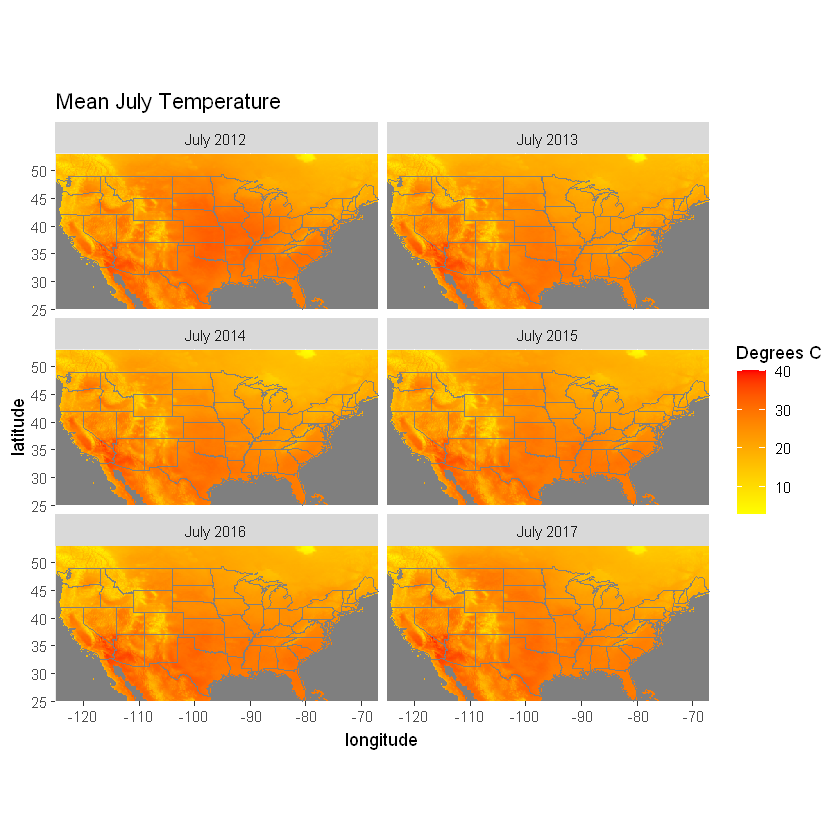

In [36]:
ggplot() +
  geom_raster(data = tempstack_df, 
              aes(x = x, 
                  y = y, 
                  fill = value)) +
  geom_sf(data = states_sf, 
          fill = NA,
          color = "grey50", 
          size = 0.25) +
  scale_fill_gradient(name = "Degrees C", 
                      low = "yellow", 
                      high = "red") +
  coord_sf(expand = FALSE) +
  facet_wrap(facets = vars(variable), ncol = 2) + 
  labs(title = "Mean July Temperature",
       x = "longitude", 
       y = "latitude")

### 对栅格数据做简单计算

In [56]:
# 直接使用mean() 可以对所有的layer， pixel to pixel 取均值
meantemp <- mean(tempstack)
meantemp

class       : SpatRaster 
dimensions  : 224, 464, 1  (nrow, ncol, nlyr)
resolution  : 0.125, 0.125  (x, y)
extent      : -125.0005, -67.0005, 25.0005, 53.0005  (xmin, xmax, ymin, ymax)
coord. ref. : lon/lat WGS 84 (EPSG:4326) 
source(s)   : memory
name        :     mean 
min value   : 277.0767 
max value   : 311.6567 

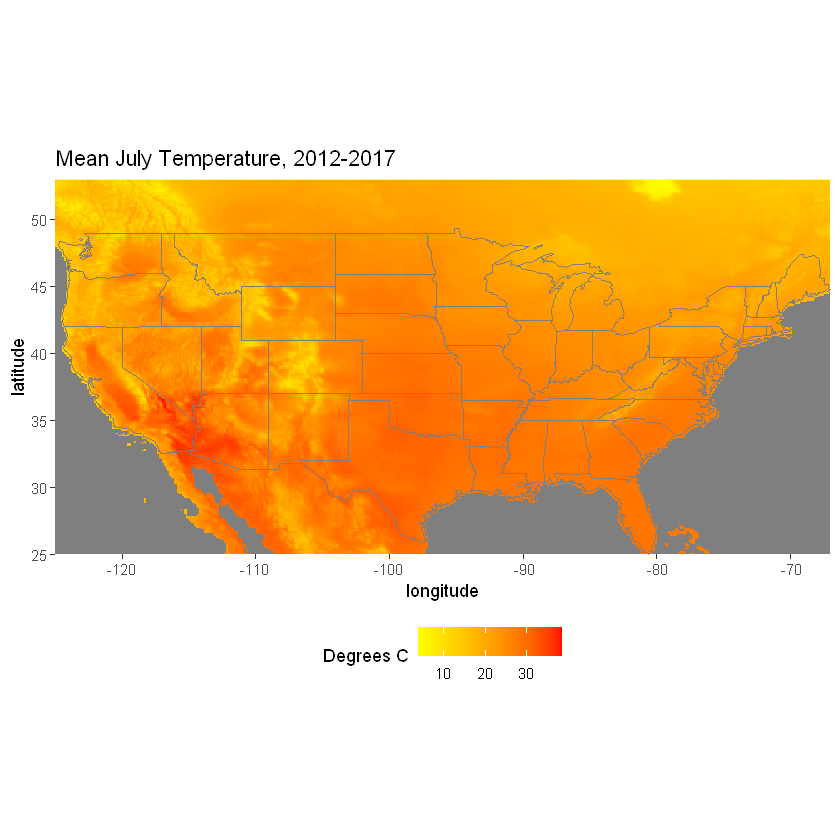

In [38]:
meantemp_df <- rasterdf(meantemp)

ggplot() +
  geom_raster(data = meantemp_df, aes(x = x, 
                                      y = y, 
                                      fill = value)) +
  geom_sf(data = states_sf, 
          fill = NA, 
          color = "grey50", 
          size = 0.25) +
  scale_fill_gradient(name = "Degrees C", 
                      low = "yellow", 
                      high = "red") +
  coord_sf(expand = FALSE) +
  labs(title = "Mean July Temperature, 2012-2017",
       x = "longitude", y = "latitude") +
  theme(legend.position = "bottom")

每一layer的pixel， pixel to pixel 减去均值，代表每个位置点的离均差

In [39]:
tempanom <- tempstack - meantemp
names(tempanom) <- names(tempstack)

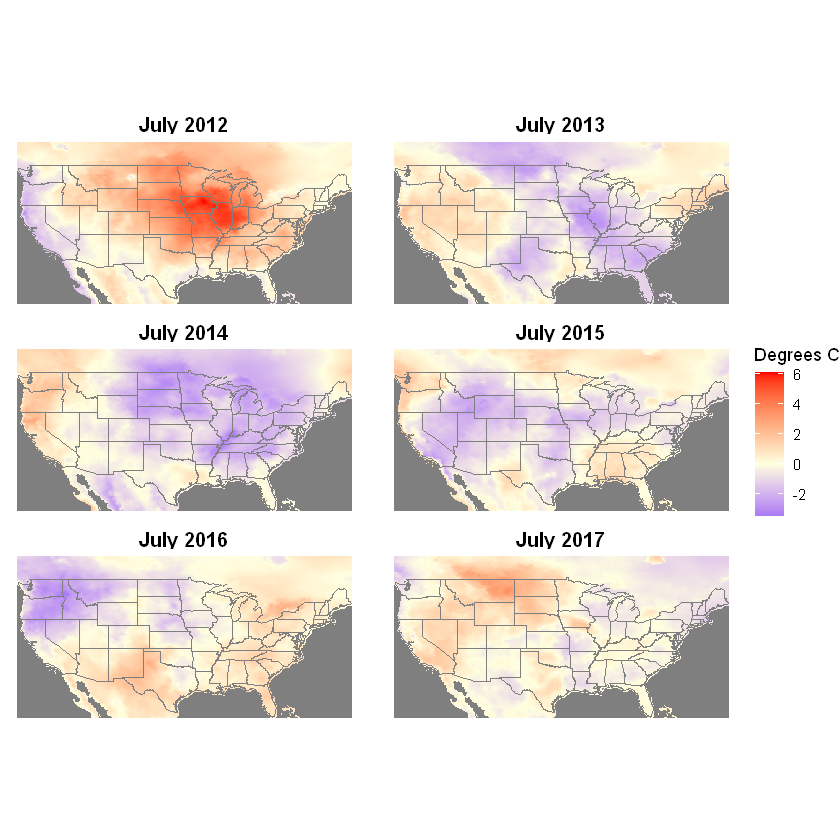

In [40]:
tempanom_df <- rasterdf(tempanom)

ggplot() +
  geom_raster(data = tempanom_df, aes(x = x, 
                                      y = y, 
                                      fill = value)) +
  geom_sf(data = states_sf, 
          fill = NA,
          color = "grey50", 
          size = 0.25) +
  scale_fill_gradient2(name = "Degrees C", 
                       low = "blue", 
                       mid = "lightyellow", 
                       high = "red") +
  coord_sf(expand = TRUE) +
  facet_wrap(facets = vars(variable), ncol = 2) + 
  theme_void() +
  theme(strip.text.x = element_text(size=12, face="bold"))

如何单独提取某一层？

In [41]:
temp1 <- tempstack[[1]]
names(temp1)

temp2 <- tempstack[["July 2012"]]
names(temp2)

temp3 <- tempstack[[1:3]]
names(temp3)

[1] "July 2012"

[1] "July 2012"

[1] "July 2012" "July 2013" "July 2014"

#### plot函数也可以对SpatRaster做可视化

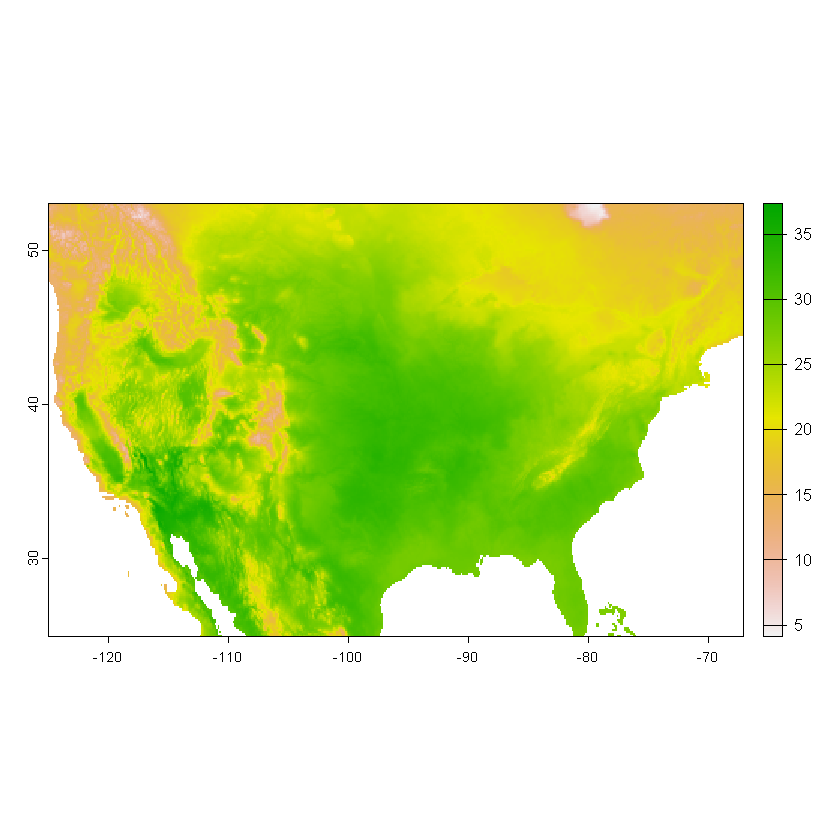

In [42]:
plot(tempstack[[1]])

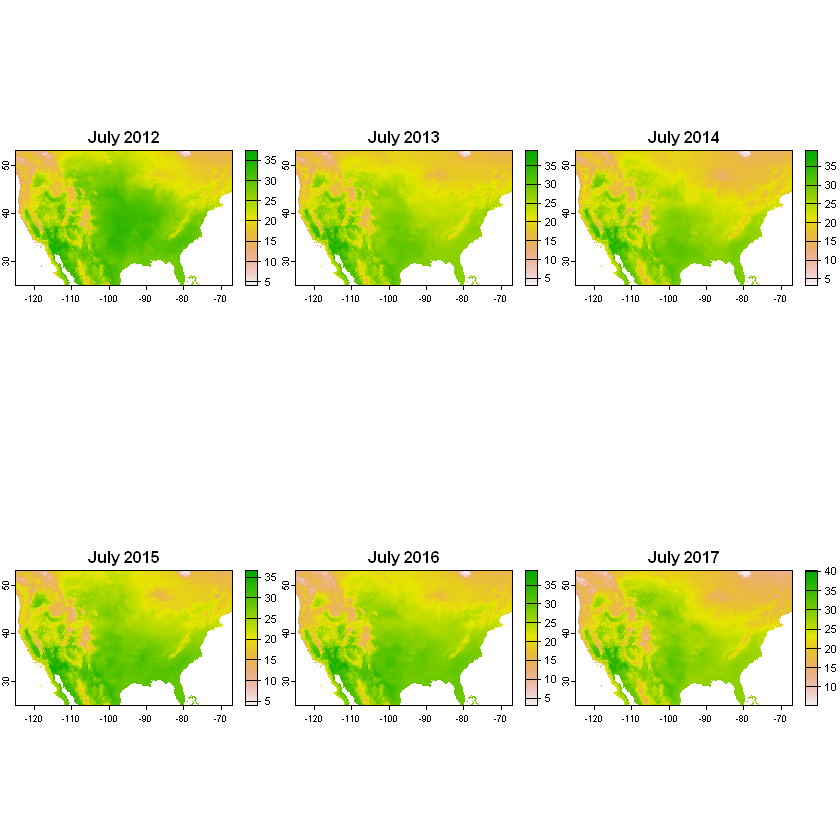

In [43]:
plot(tempstack)

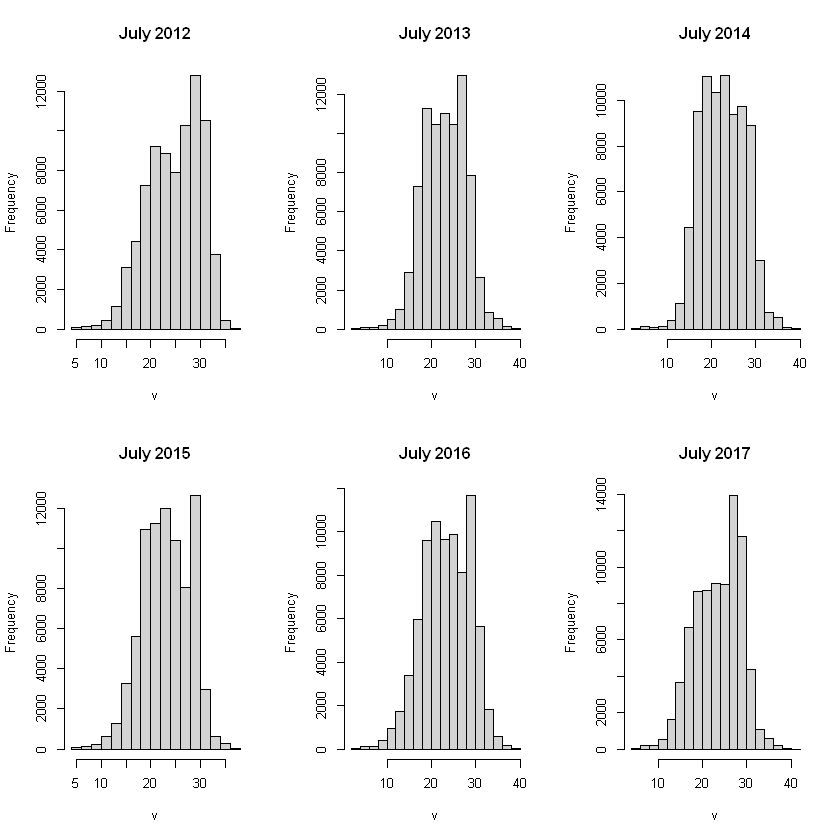

In [44]:
hist(tempstack)

Error in data.frame(dev = paste(names(d), d[[1]], sep = "_"), rbind(clp),  : 
  参数值意味着不同的行数: 1, 0


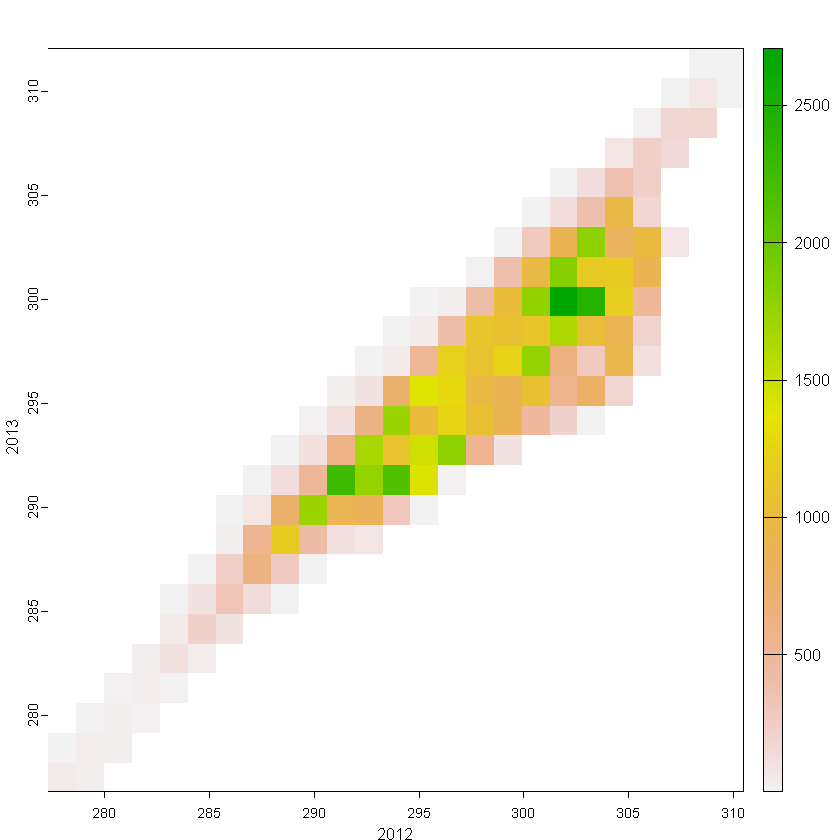

In [45]:
plot(temp2012, temp2013, 
     xlab = "2012", 
     ylab = "2013", 
     gridded = TRUE)